## Weather data analysis


In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import glob
from math import pi

import datetime
import sys


In [8]:
# Reading all the CSV files
# Saving them in one pandas dataframe

path = r'data/weather_swiss_meteo/VS_NBCN_processed.csv'  

df = pd.read_csv(path, header = 0, sep= ',') 



In [9]:
df.head()

station/location      date gre000d0 hto000d0 nto000d0  prestad0  rre150d0  \
0              SIO  19580101        -        0        4     954.8       0.0   
1              SIO  19580102        -        0       21     954.2       0.0   
2              SIO  19580103        -        0       21     962.3       0.0   
3              SIO  19580104        -        0       54     966.9       0.0   
4              SIO  19580105        -        0       96     958.5      10.0   

  sre000d0  tre200d0  tre200dn  tre200dx ure200d0  
0        -      -3.4      -8.7       4.0        -  
1        -      -3.8     -10.4       3.3        -  
2        -      -3.4      -8.5       5.0        -  
3        -      -3.3      -9.4       2.1        -  
4        -       2.1      -1.8       6.2        -

In [10]:
df.describe()
count = df.count()
print(count)

station/location    23011
date                23011
gre000d0            23011
hto000d0            23011
nto000d0            23011
prestad0            23011
rre150d0            23011
sre000d0            23011
tre200d0            23011
tre200dn            23011
tre200dx            23011
ure200d0            23011
dtype: int64


In [16]:
print(df['tre200d0'])

0       -3.4
1       -3.8
2       -3.4
3       -3.3
4        2.1
        ... 
23006   -1.5
23007    1.4
23008    0.8
23009    0.1
23010    1.3
Name: tre200d0, Length: 23011, dtype: float64


## List of variables

In [26]:
parameters = '''
Parameters           Unit             Description
gre000d0             W/m²             Global radiation; daily mean
hto000d0             cm               Total snow depth; morning recording at 6 UTC
nto000d0             %                Cloud cover; daily mean
prestad0             hPa              Pressure at station level (QFE); daily mean
rre150d0             mm               Precipitation; daily total 6 UTC - 6 UTC following day
sre000d0             min              Sunshine duration; daily total
tre200d0             °C               Air temperature 2 m above ground; daily mean
tre200dn             °C               Air temperature 2 m above ground; daily minimum
tre200dx             °C               Air temperature 2 m above ground; daily maximum
ure200d0             %                Relative air humidity; 2 m above ground; daily mean
'''

def time_to_date(timestamp):
    year = int(timestamp[0:4])
    month = int(timestamp[4:6])
    day = int(timestamp[6:8])
    #hour = int(timestamp[9:11])
    #minute = int(timestamp[11:13])
    #print("year {}".format(timestamp[0:4]))
    #print("month {}".format(timestamp[4:6]))
    #print("day {}".format(timestamp[6:8]))
    #print("hour {}".format(timestamp[9:11]))  
    #print("minute {}".format(timestamp[11:13]))    
    
    return datetime.datetime(year, month, day)#, hour, minute)

print(parameters)


Parameters           Unit             Description
gre000d0             W/m²             Global radiation; daily mean
hto000d0             cm               Total snow depth; morning recording at 6 UTC
nto000d0             %                Cloud cover; daily mean
prestad0             hPa              Pressure at station level (QFE); daily mean
rre150d0             mm               Precipitation; daily total 6 UTC - 6 UTC following day
sre000d0             min              Sunshine duration; daily total
tre200d0             °C               Air temperature 2 m above ground; daily mean
tre200dn             °C               Air temperature 2 m above ground; daily minimum
tre200dx             °C               Air temperature 2 m above ground; daily maximum
ure200d0             %                Relative air humidity; 2 m above ground; daily mean



In [13]:
## Plot font size
SMALL_SIZE = 8
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title



## Temperature and Relative humidity [2 m above gnd]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Daily mean temperature')

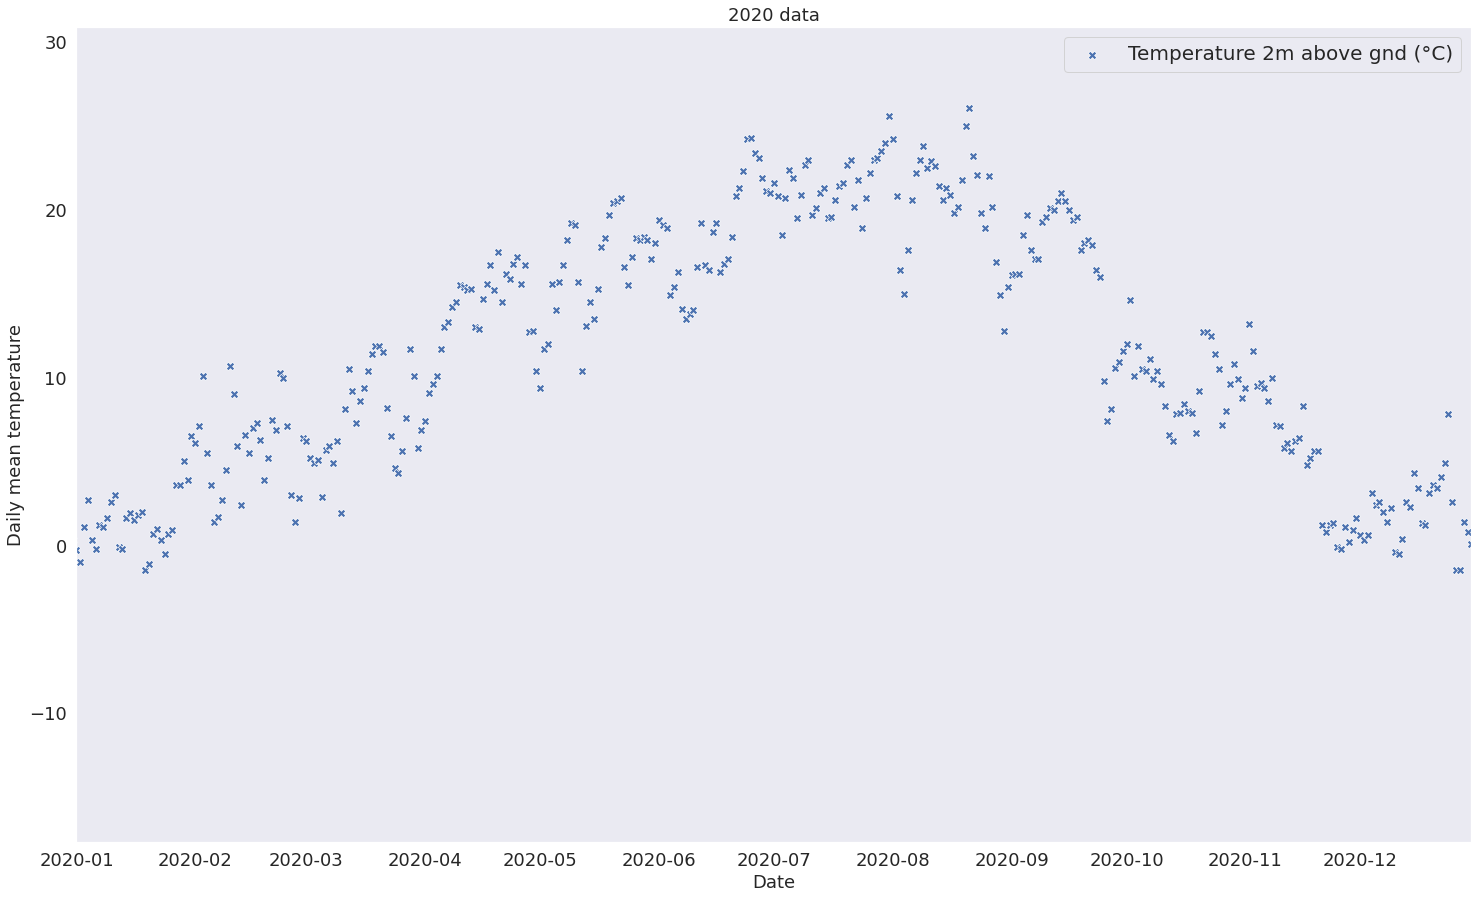

In [35]:
fig = plt.figure(figsize=(25, 15))
ax1 = fig.add_subplot(111)
ax1.grid()

date_column = df["date"].map(str).apply(time_to_date)


ax1 = sns.scatterplot(date_column, df["tre200d0"], data=df, marker='X', s=70, label='Temperature 2m above gnd (°C)')

## Plot only last 20 years
#ax1.set_xlim(datetime.date(2000, 1, 1), datetime.date(2020, 1, 1))

## Plot only 2020
ax1.set_xlim(datetime.date(2020, 1, 1), datetime.date(2020, 12, 30))

ax1.set_title("2020 data")
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily mean temperature')
#ax1.legend(title="Legend", loc=(0, -0.1))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Daily mean temperature')

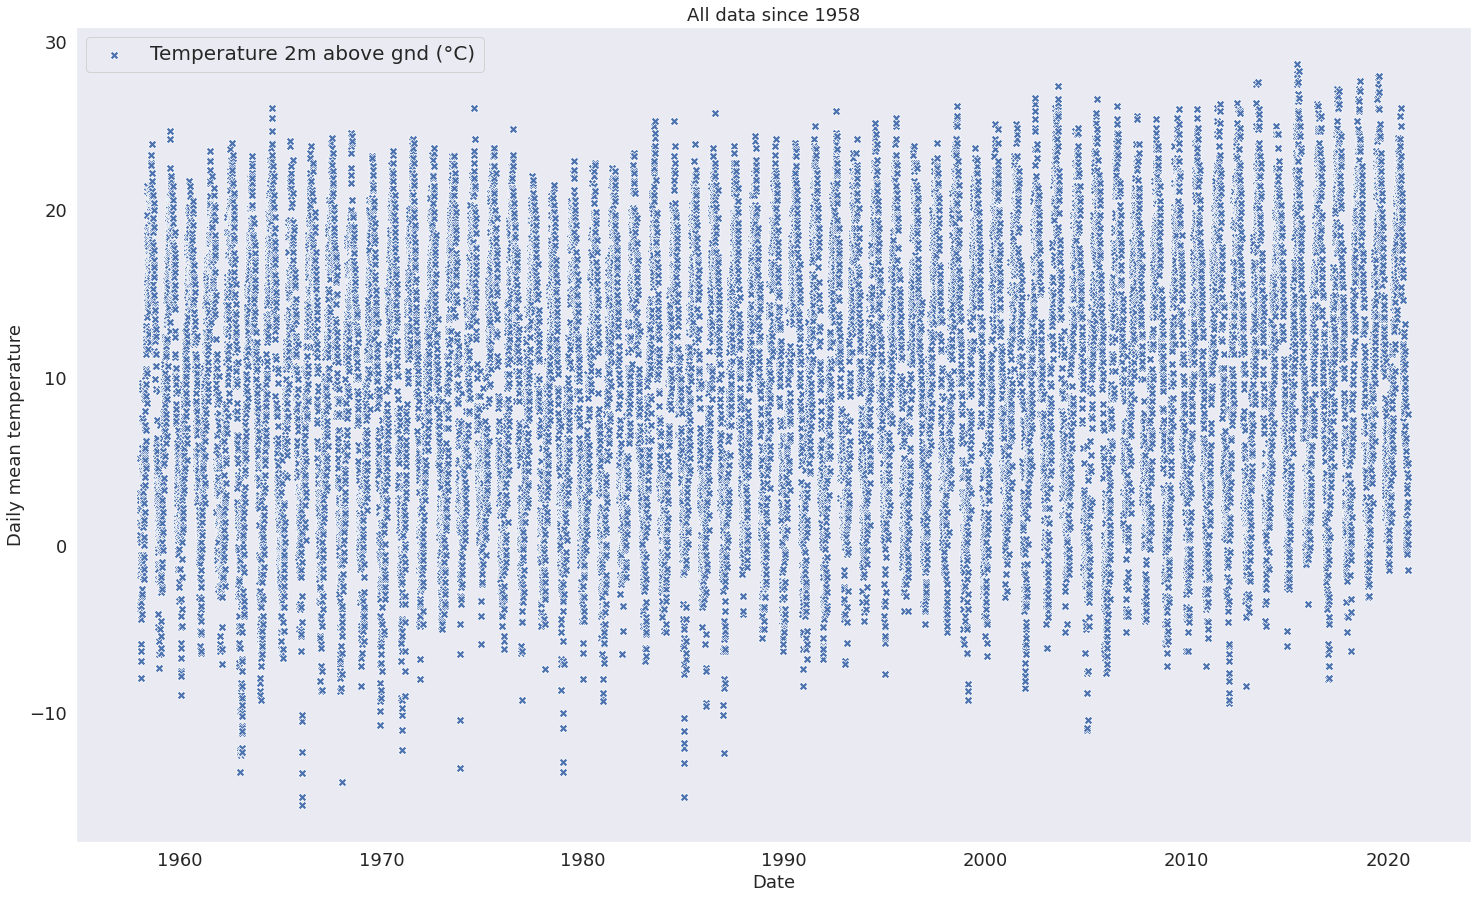

In [36]:
fig = plt.figure(figsize=(25, 15))
ax1 = fig.add_subplot(111)
ax1.grid()

date_column = df["date"].map(str).apply(time_to_date)


ax1 = sns.scatterplot(date_column, df["tre200d0"], data=df, marker='X', s=70, label='Temperature 2m above gnd (°C)')

## Plot only last 20 years
#ax1.set_xlim(datetime.date(2000, 1, 1), datetime.date(2020, 1, 1))

## Plot only 2020
#ax1.set_xlim(datetime.date(2020, 1, 1), datetime.date(2020, 12, 30))

ax1.set_title("All data since 1958")
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily mean temperature')
#ax1.legend(title="Legend", loc=(0, -0.1))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Daily min temperature')

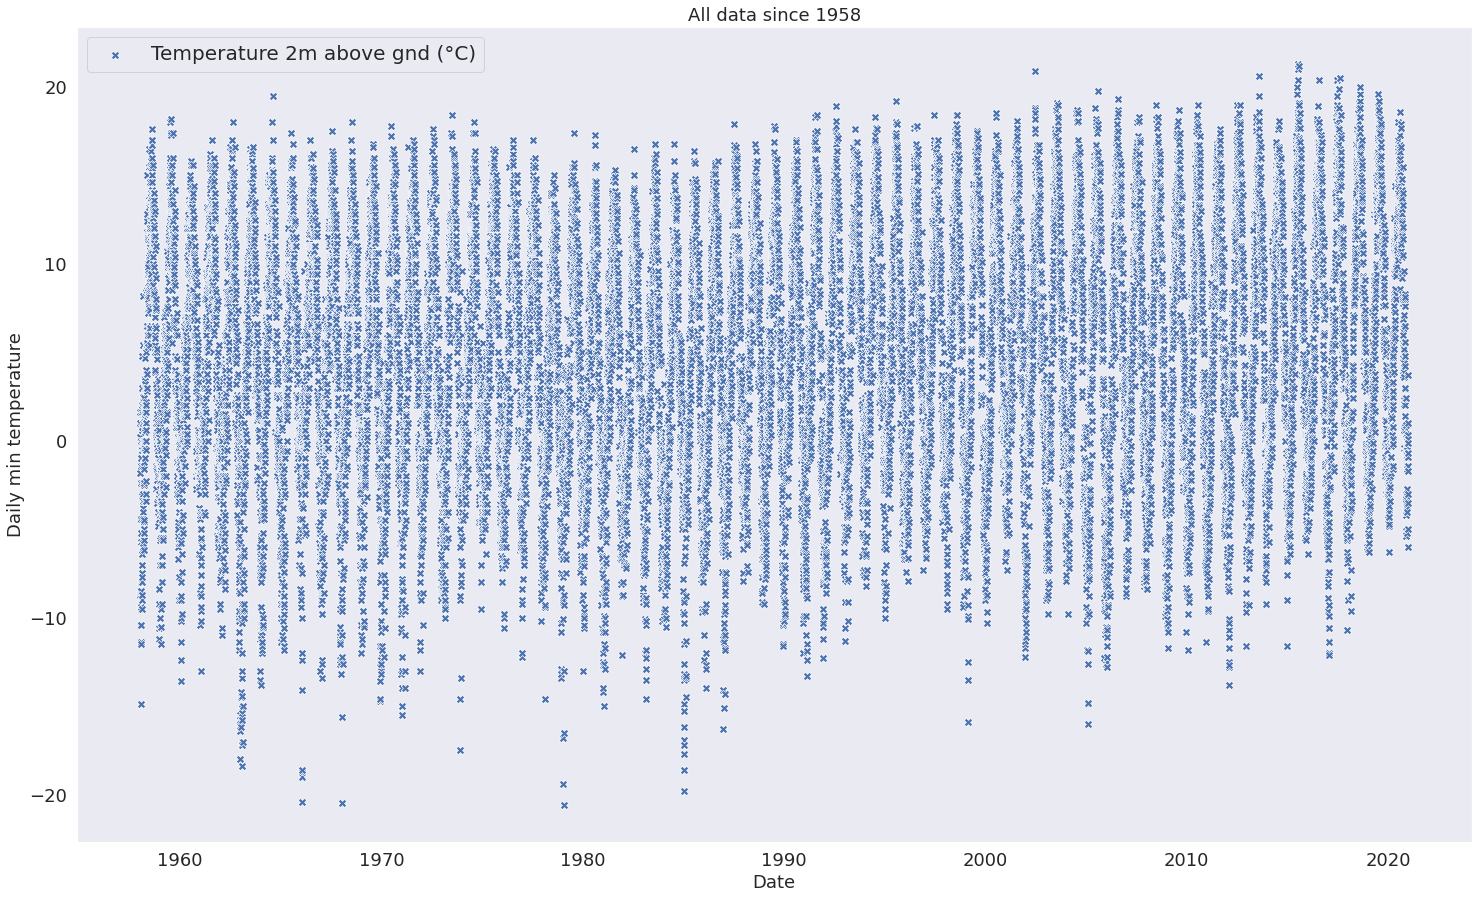

In [37]:
fig = plt.figure(figsize=(25, 15))
ax1 = fig.add_subplot(111)
ax1.grid()

date_column = df["date"].map(str).apply(time_to_date)


ax1 = sns.scatterplot(date_column, df["tre200dn"], data=df, marker='X', s=70, label='Temperature 2m above gnd (°C)')

## Plot only last 20 years
#ax1.set_xlim(datetime.date(2000, 1, 1), datetime.date(2020, 1, 1))

ax1.set_title("All data since 1958")
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily min temperature')
#ax1.legend(title="Legend", loc=(0, -0.1))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Daily max temperature')

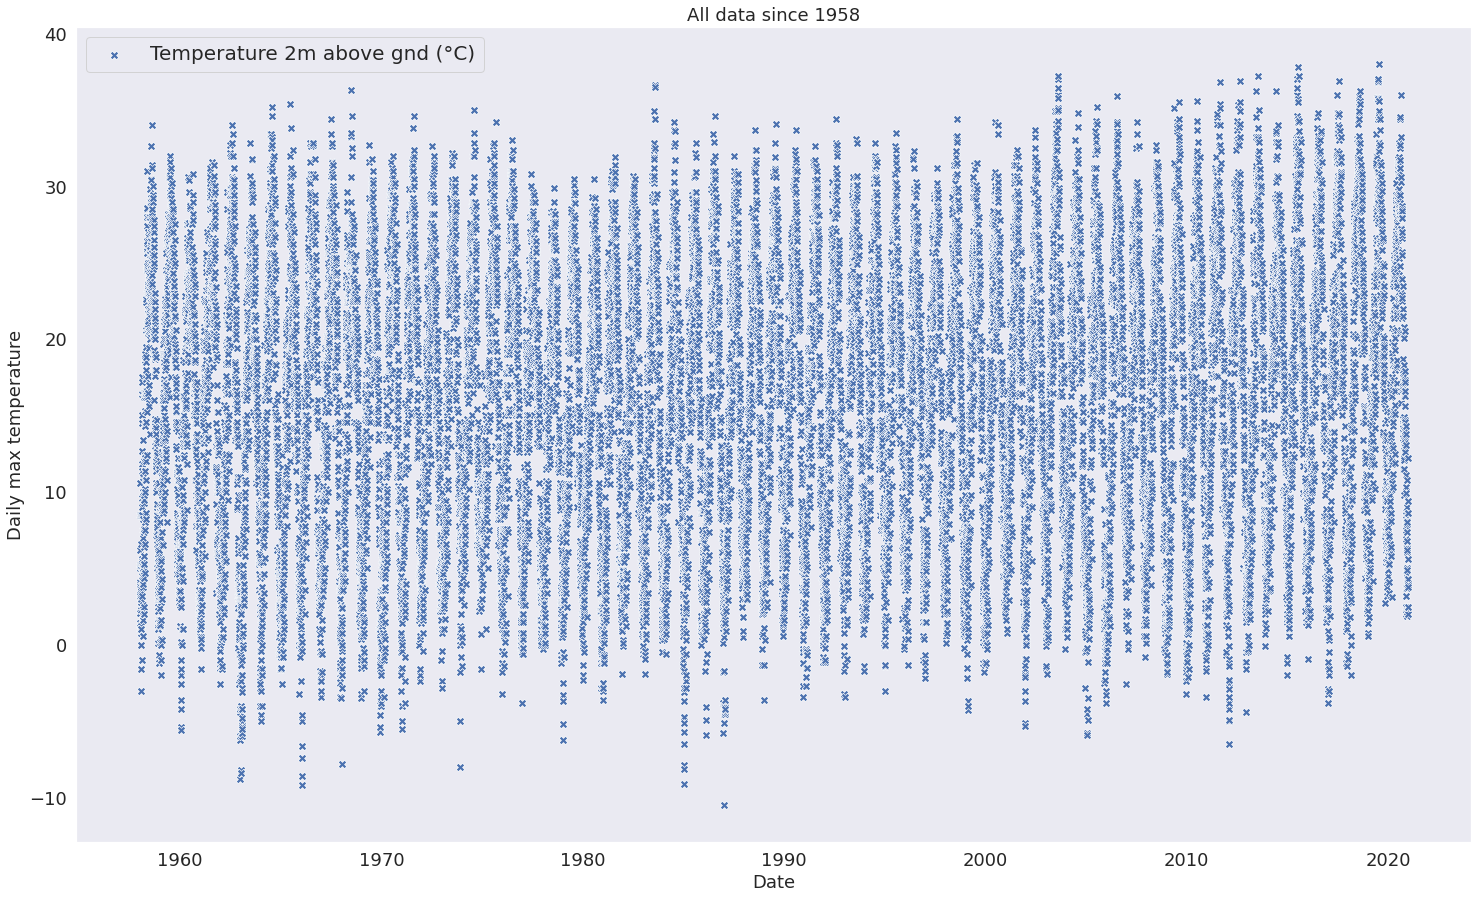

In [38]:
fig = plt.figure(figsize=(25, 15))
ax1 = fig.add_subplot(111)
ax1.grid()

date_column = df["date"].map(str).apply(time_to_date)


ax1 = sns.scatterplot(date_column, df["tre200dx"], data=df, marker='X', s=70, label='Temperature 2m above gnd (°C)')

## Plot only last 20 years
#ax1.set_xlim(datetime.date(2000, 1, 1), datetime.date(2020, 1, 1))

ax1.set_title("All data since 1958")
ax1.set_xlabel('Date')
ax1.set_ylabel('Daily max temperature')
#ax1.legend(title="Legend", loc=(0, -0.1))


## Mean Sea Level Pressure

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


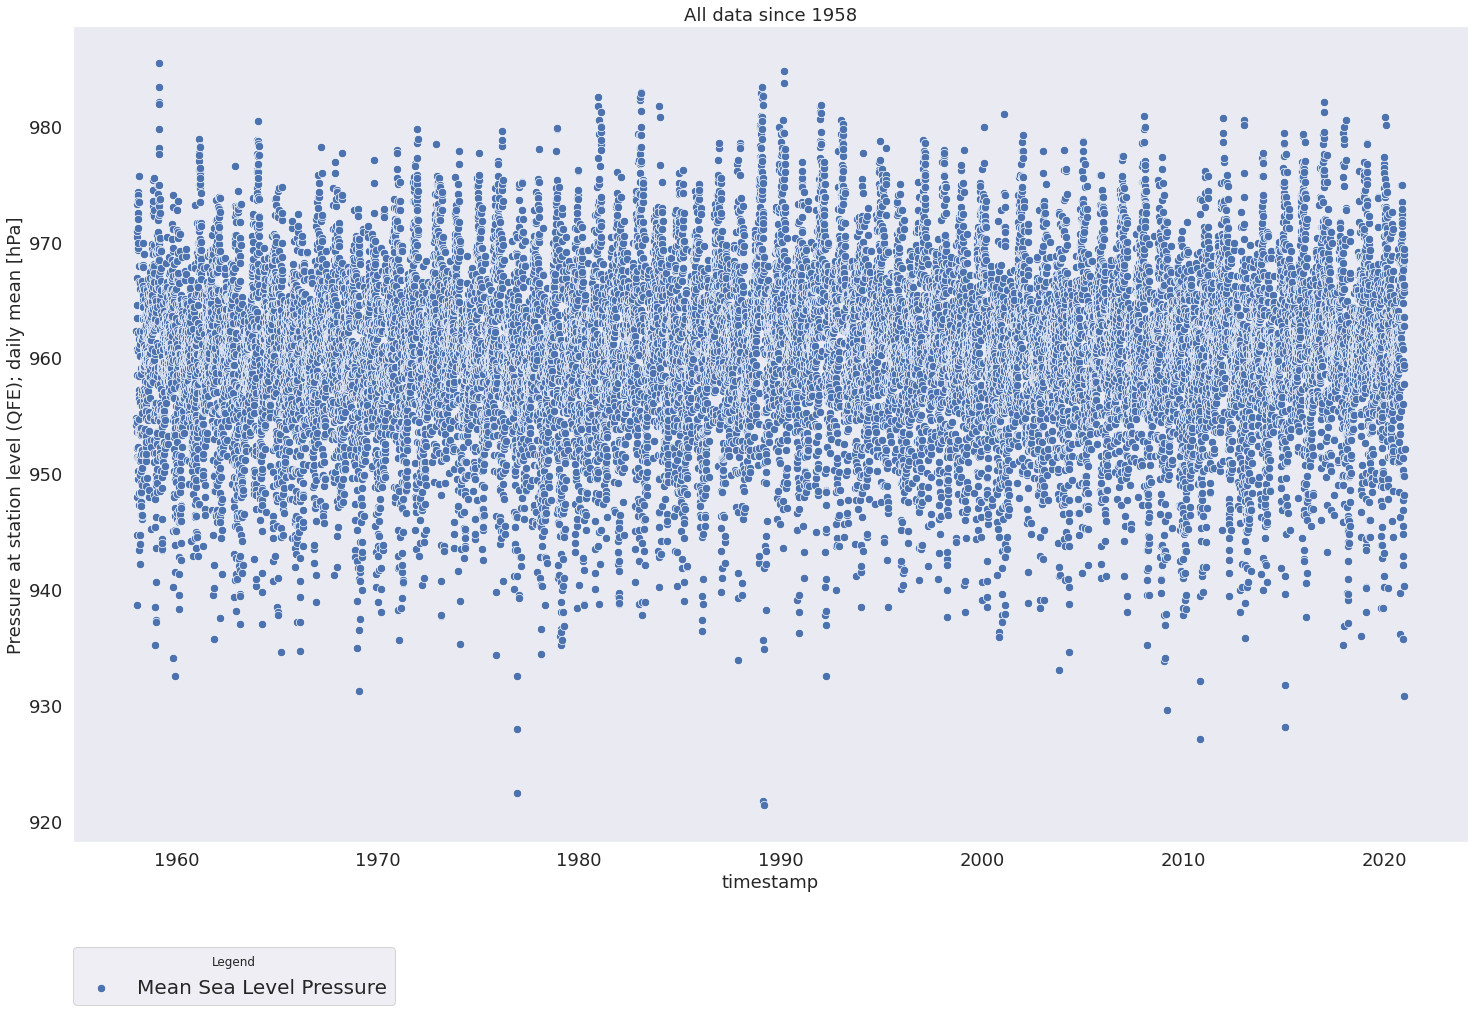

In [45]:
fig = plt.figure(figsize=(25, 15))
ax_pressure = fig.add_subplot(111)
plt.grid()

date_column = df["date"].map(str).apply(time_to_date)

ax_pressure = sns.scatterplot(date_column, df["prestad0"], data=df, marker='o', s=70, label='Mean Sea Level Pressure')

## Plot only last 20 years
#ax_pressure.set_xlim(datetime.date(2000, 1, 1), datetime.date(2020, 1, 1))

ax_pressure.set_title("All data since 1958")
ax_pressure.set_xlabel('timestamp')
ax_pressure.set_ylabel('Pressure at station level (QFE); daily mean [hPa]')
ax_pressure.legend(title="Legend", loc=(0, -0.2))

## Precipitation level

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


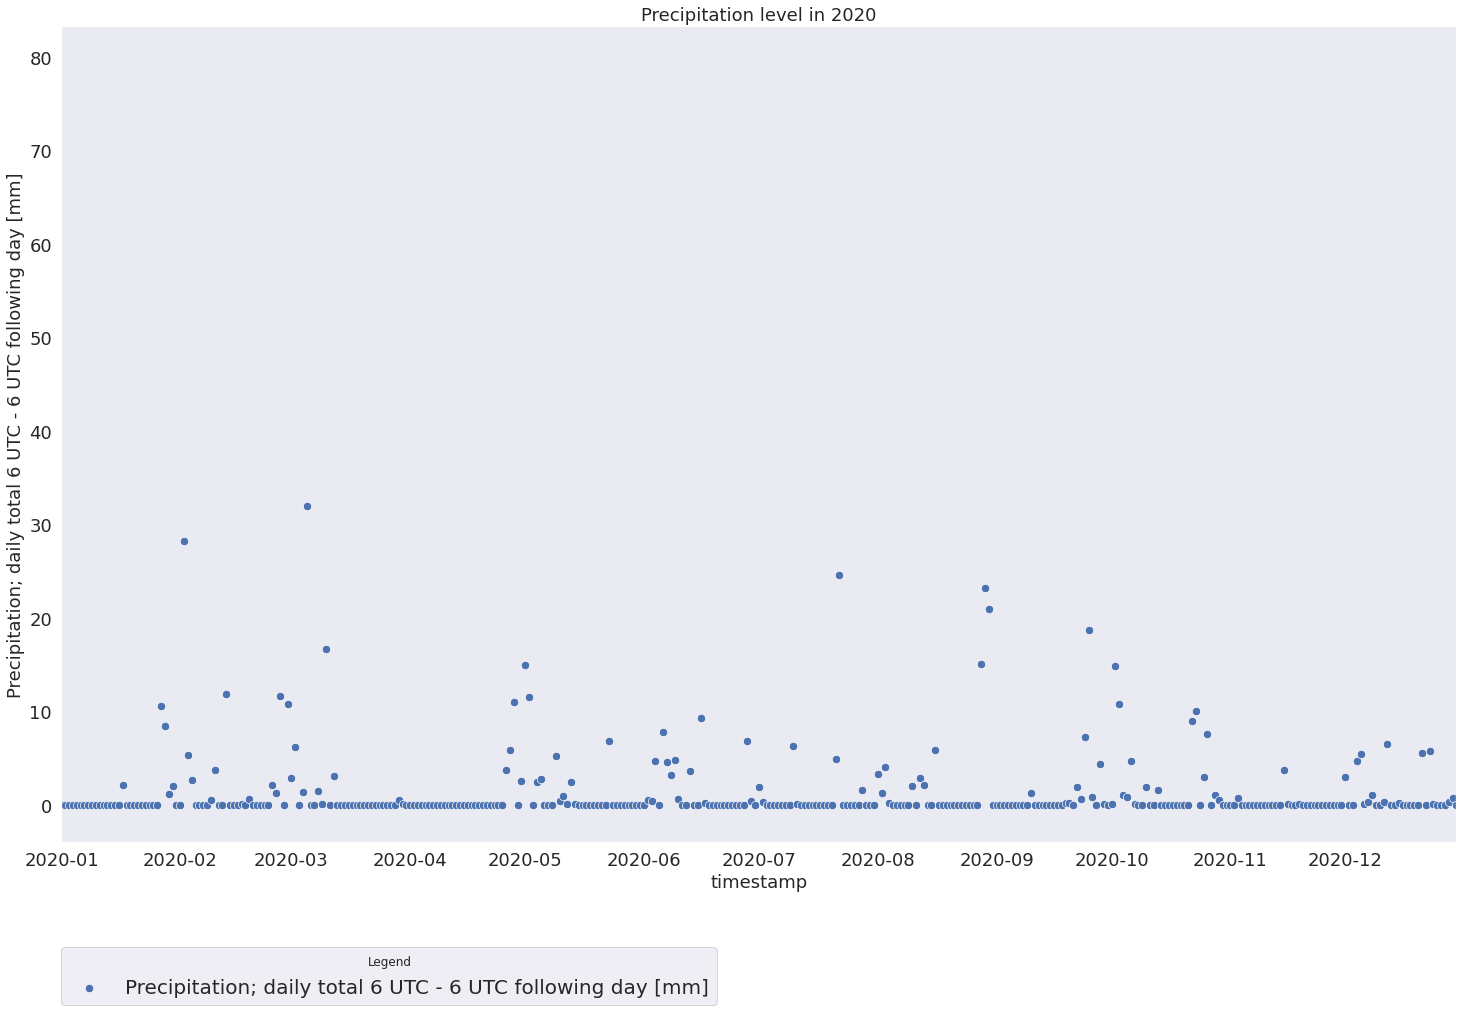

In [55]:
fig = plt.figure(figsize=(25, 15))
precipitation = fig.add_subplot(111)
plt.grid()

date_column = df["date"].map(str).apply(time_to_date)

precipitation = sns.scatterplot(date_column, df["rre150d0"], data=df, marker='o', s=70, label='Precipitation; daily total 6 UTC - 6 UTC following day [mm]')

## Plot only last 20 years
#ax_pressure.set_xlim(datetime.date(2000, 1, 1), datetime.date(2020, 1, 1))
## Plot only 2020
precipitation.set_xlim(datetime.date(2020, 1, 1), datetime.date(2020, 12, 30))



precipitation.set_title("Precipitation level in 2020")
precipitation.set_xlabel('timestamp')
precipitation.set_ylabel('Precipitation; daily total 6 UTC - 6 UTC following day [mm]')
precipitation.legend(title="Legend", loc=(0, -0.2))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


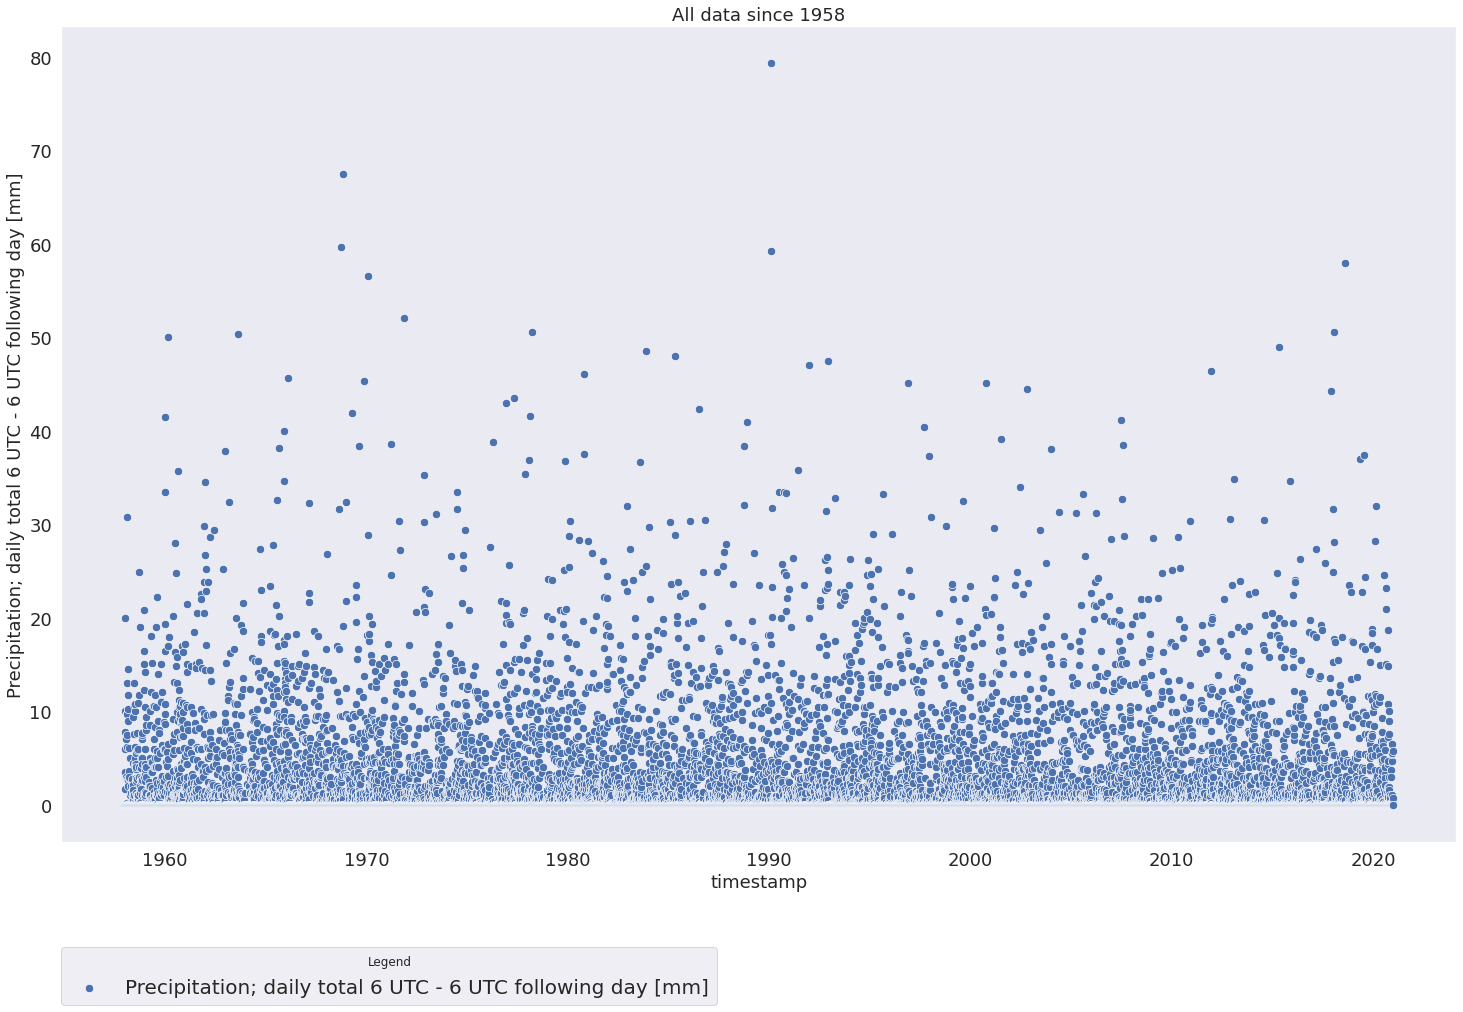

In [56]:
fig = plt.figure(figsize=(25, 15))
precipitation = fig.add_subplot(111)
plt.grid()

date_column = df["date"].map(str).apply(time_to_date)

precipitation = sns.scatterplot(date_column, df["rre150d0"], data=df, marker='o', s=70, label='Precipitation; daily total 6 UTC - 6 UTC following day [mm]')

## Plot only last 20 years
#ax_pressure.set_xlim(datetime.date(2000, 1, 1), datetime.date(2020, 1, 1))
## Plot only 2020
#precipitation.set_xlim(datetime.date(2020, 1, 1), datetime.date(2020, 12, 30))



precipitation.set_title("All data since 1958")
precipitation.set_xlabel('timestamp')
precipitation.set_ylabel('Precipitation; daily total 6 UTC - 6 UTC following day [mm]')
precipitation.legend(title="Legend", loc=(0, -0.2))

## Total snow depth

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


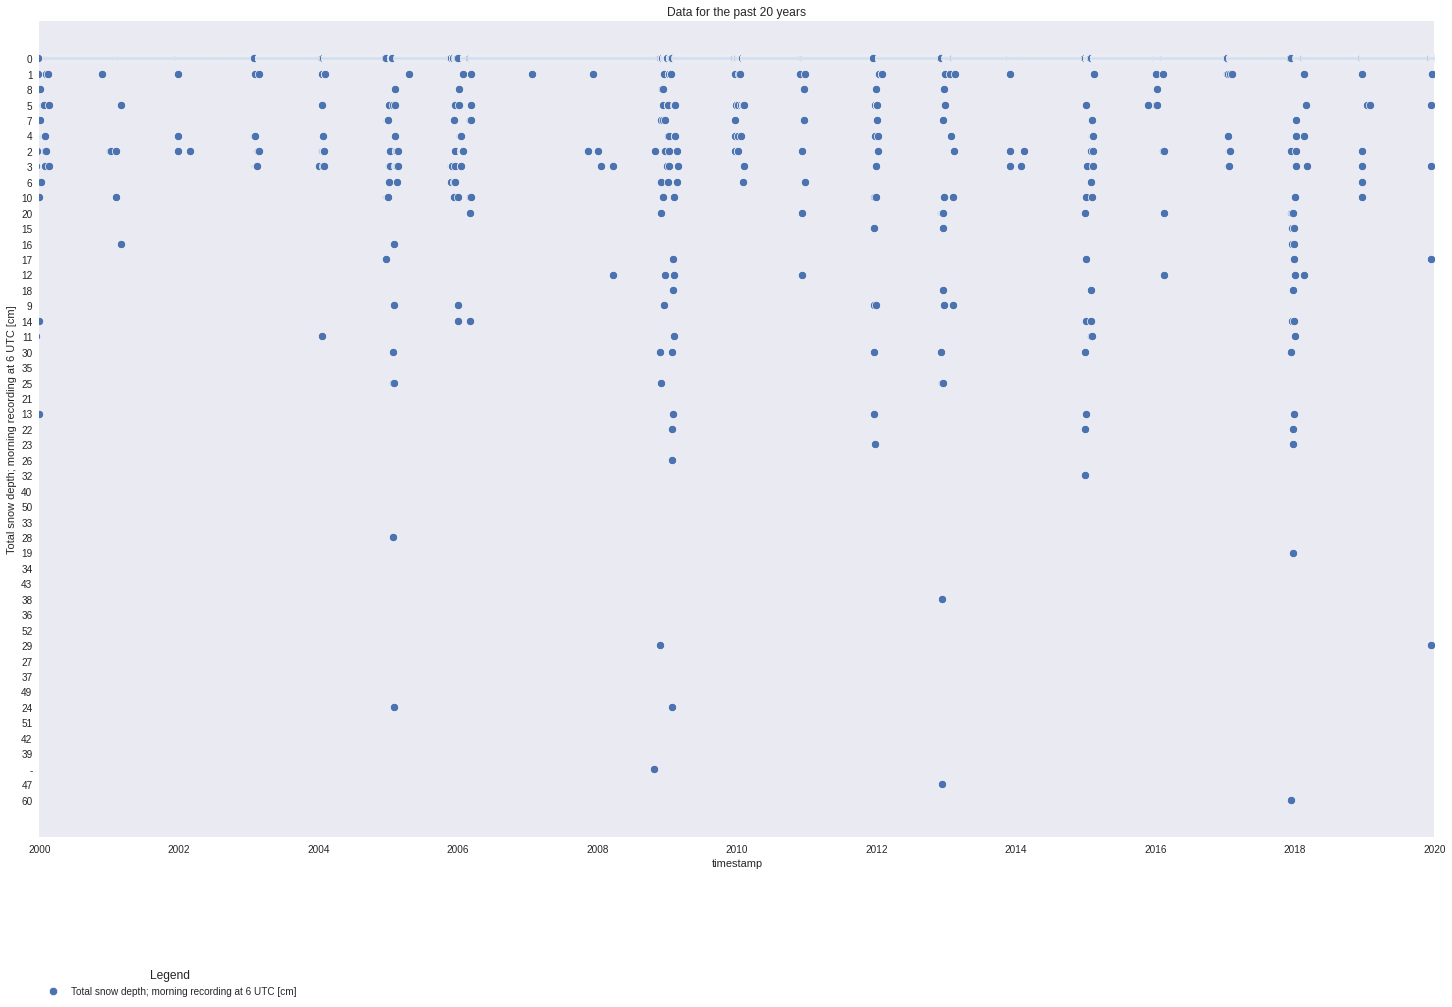

In [61]:
fig = plt.figure(figsize=(25, 15))
snow_depth = fig.add_subplot(111)
plt.grid()

date_column = df["date"].map(str).apply(time_to_date)

snow_depth = sns.scatterplot(date_column, df["hto000d0"], data=df, marker='o', s=70, label='Total snow depth; morning recording at 6 UTC [cm]')

## Plot only last 20 years
snow_depth.set_xlim(datetime.date(2000, 1, 1), datetime.date(2020, 1, 1))
## Plot only 2020
#snow_depth.set_xlim(datetime.date(2020, 1, 1), datetime.date(2020, 12, 30))



snow_depth.set_title("Data for the past 20 years")
snow_depth.set_xlabel('timestamp')
snow_depth.set_ylabel('Total snow depth; morning recording at 6 UTC [cm]')
snow_depth.legend(title="Legend", loc=(0, -0.2))

## Correlation between variables

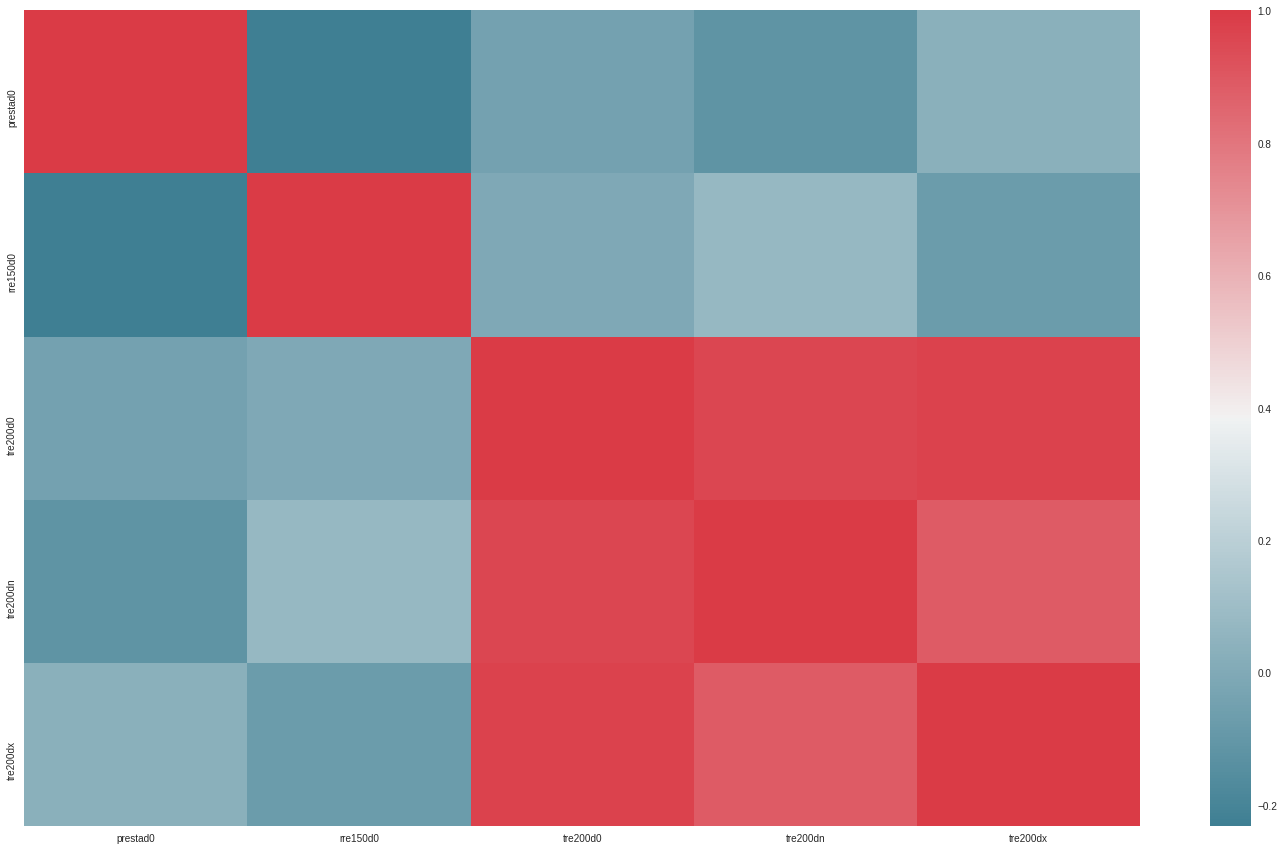

In [62]:
plt.style.use('seaborn') 
fig = plt.figure(figsize=(25, 15))
ax2 = fig.add_subplot(111)
corr = df.loc[:,df.dtypes == 'float64'].corr()
ax2 = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.diverging_palette(220, 10, as_cmap=True))
